# Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".


In [5]:
LINKS = {
    "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet",
    "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet",
}


In [6]:
for link in LINKS:
    filename = link.split("/")[-1]
    !curl --create-dir -s -o ./data/{filename} {link}

In [7]:
import pandas as pd


In [8]:
jan_df = pd.read_parquet("./data/fhv_tripdata_2021-01.parquet")
len(jan_df)


1154112

Read the data for January. How many records are there?

-   ~~1054112~~
-   **1154112**
-   ~~1254112~~
-   ~~1354112~~


## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 


In [9]:
jan_df["duration"] = (jan_df["dropOff_datetime"] - jan_df["pickup_datetime"]).apply(
    lambda delta: delta.total_seconds() / 60
)

jan_df["duration"].mean()

19.167224093791006

What's the average trip duration in January?

-   ~~15.16~~
-   **19.16**
-   ~~24.16~~
-   ~~29.16~~


## Data preparation

Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).


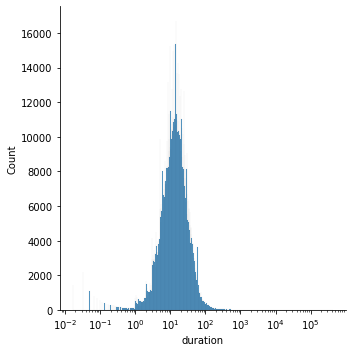

In [10]:
import seaborn as sns

sns.displot(jan_df["duration"], log_scale=True)


In [11]:
initial_count = len(jan_df)
jan_df = jan_df[(jan_df["duration"] <= 60) & (jan_df["duration"] >= 1)]
diff = initial_count - len(jan_df)
diff


44286

How many records did you drop?

**44286**


## Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".


In [12]:
# Keep only the columns we need (PUlocationID, DOlocationID and duration)
categorical = ["PUlocationID", "DOlocationID"]
cols_to_keep = categorical + ["duration"]
jan_df = jan_df[cols_to_keep]

# Replace all nan with -1
jan_df = jan_df.fillna(-1)

nan_count = len(jan_df[(jan_df.PUlocationID == -1) | (jan_df.DOlocationID == -1)])

f"{nan_count/len(jan_df):.2%}"


'84.53%'

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

-   ~~53%~~
-   ~~63%~~
-   ~~73%~~
-   **83%**


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

-   Turn the dataframe into a list of dictionaries
-   Fit a dictionary vectorizer
-   Get a feature matrix from it


In [13]:
from sklearn.feature_extraction import DictVectorizer

# Convert to list of dictionaries
train_dicts = jan_df[categorical].to_dict(orient='records')

# Fit the vectorizer on the training data
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train.shape[1]

2

What's the dimensionality of this matrix? (The number of columns).

-   **2**
-   ~~152~~
-   ~~352~~
-   ~~525~~
-   ~~725~~


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y_train = jan_df['duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

11.415432830521663

What's the RMSE on train?

* ~~5.52~~
* **10.52 (11.41)**
* ~~15.52~~
* ~~20.52~~

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021).


In [15]:
feb_df = pd.read_parquet("./data/fhv_tripdata_2021-02.parquet")



feb_df["duration"] = (feb_df["dropOff_datetime"] - feb_df["pickup_datetime"]).apply(
    lambda delta: delta.total_seconds() / 60
)

feb_df = feb_df[(feb_df["duration"] <= 60) & (feb_df["duration"] >= 1)]


feb_df = feb_df[cols_to_keep]

feb_df = feb_df.fillna(-1)

test_dicts = feb_df[categorical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_test = feb_df['duration'].values

y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

11.85822362355935

What's the RMSE on validation?

* ~~6.01~~
* **11.01**
* ~~16.01~~
* ~~21.01~~